In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
os.getcwd()

'/Users/user/Documents/GitHub/NORmet/tutorials'

In [3]:
os.chdir('../')

In [4]:
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])

In [5]:
import normet.autodew as ad

In [6]:
#from normet.autodew import do_all

In [7]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [8]:
date_start = time.time()
df_dew=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=100,fraction=0.75)
date_post_training = time.time()
date_post_training-date_start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


[flaml.automl.automl: 03-28 15:59:45] {2726} INFO - task = regression
[flaml.automl.automl: 03-28 15:59:45] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-28 15:59:45] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 03-28 15:59:45] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-28 15:59:45] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-28 15:59:45] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-28 15:59:45] {3472} INFO - Estimated sufficient time budget=757s. Estimated necessary time budget=5s.
[flaml.automl.automl: 03-28 15:59:45] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8661,	best estimator lgbm's best error=0.8661
[flaml.automl.automl: 03-28 15:59:45] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-28 15:59:45] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.8661,	best estim

[flaml.automl.automl: 03-28 16:00:01] {3519} INFO -  at 16.1s,	estimator extra_tree's best error=0.5232,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-28 16:00:01] {3334} INFO - iteration 34, current learner rf
[flaml.automl.automl: 03-28 16:00:01] {3519} INFO -  at 16.2s,	estimator rf's best error=0.5055,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-28 16:00:01] {3334} INFO - iteration 35, current learner xgboost
[flaml.automl.automl: 03-28 16:00:01] {3519} INFO -  at 16.3s,	estimator xgboost's best error=0.3770,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-28 16:00:01] {3334} INFO - iteration 36, current learner extra_tree
[flaml.automl.automl: 03-28 16:00:01] {3519} INFO -  at 16.4s,	estimator extra_tree's best error=0.4612,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-28 16:00:01] {3334} INFO - iteration 37, current learner extra_tree
[flaml.automl.automl: 03-28 16:00:01] {3519} INFO -  at 16.4s,	estimat

80.62491989135742

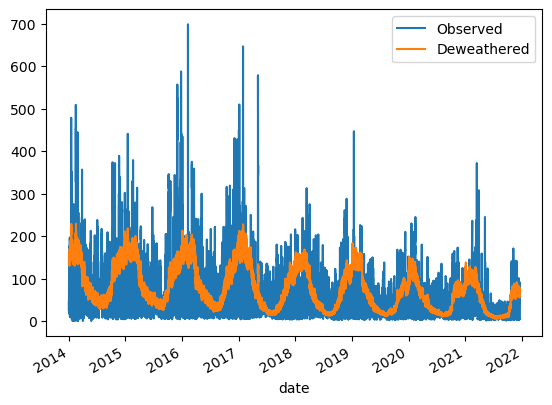

In [9]:
df_dew.plot()

In [10]:
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])
df=ad.prepare_data(df, value='PM2.5', split_method = 'random',na_rm=False, replace=False, fraction=0.75)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [11]:
df.head()

,rowid,date,ssr,tp,blh,tcc,sp,ws,wd,air_temp,...,SO2,PM10,value,Ox,Lunar_monthday,date_unix,day_julian,weekday,hour,set
0,0,2014-01-01 08:00:00,1.136630e+04,0.0,22.416888,0.0,100193.701618,4.666667,278.654722,6.000000,...,28.333333,118.416667,45.166667,42.563856,12&1,1.388563e+09,1,3,8,training
1,1,2014-01-01 11:00:00,1.098169e+06,0.0,1036.592302,0.0,100372.404415,6.000000,291.603066,9.400000,...,24.250000,78.250000,28.000000,43.898884,12&1,1.388574e+09,1,3,11,training
2,2,2014-01-01 14:00:00,1.255284e+06,0.0,1653.530020,0.0,100216.797030,6.333333,292.695419,11.300000,...,15.250000,58.250000,23.166667,43.964922,12&1,1.388585e+09,1,3,14,training
3,3,2014-01-01 17:00:00,1.306076e+05,0.0,40.497319,0.0,100307.868299,3.333333,275.963757,9.366667,...,14.166667,68.583333,23.833333,44.421830,12&1,1.388596e+09,1,3,17,training
4,4,2014-01-01 20:00:00,0.000000e+00,0.0,19.378160,0.0,100514.007135,1.000000,180.000000,2.600000,...,34.666667,133.916667,59.750000,52.910328,12&1,1.388606e+09,1,3,20,training


In [13]:
automl=ad.train_model(df,variables=all_features,
                time_budget= 120,  metric= 'r2', estimator_list=['lgbm'],task= 'regression', seed= 7654321);

[flaml.automl.automl: 03-28 16:01:56] {2726} INFO - task = regression
[flaml.automl.automl: 03-28 16:01:56] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-28 16:01:56] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-28 16:01:56] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-28 16:01:56] {3004} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.automl: 03-28 16:01:56] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-28 16:01:56] {3472} INFO - Estimated sufficient time budget=1344s. Estimated necessary time budget=1s.
[flaml.automl.automl: 03-28 16:01:56] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.8725,	best estimator lgbm's best error=0.8725
[flaml.automl.automl: 03-28 16:01:56] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-28 16:01:57] {3519} INFO -  at 0.5s,	estimator lgbm's best error=0.8725,	best estimator lgbm's best error=0.8725
[flaml.automl.automl: 0

In [14]:
date_start = time.time()
df_dew = ad.normalise(automl, df, 
                           feature_names = all_features,
                          variables= ['ws','wd', 'air_temp', 'atmos_pres', 'dew_point', 'RH','blh'],
                          n_samples=1000)
date_post_training = time.time()
date_post_training-date_start

63.80173707008362

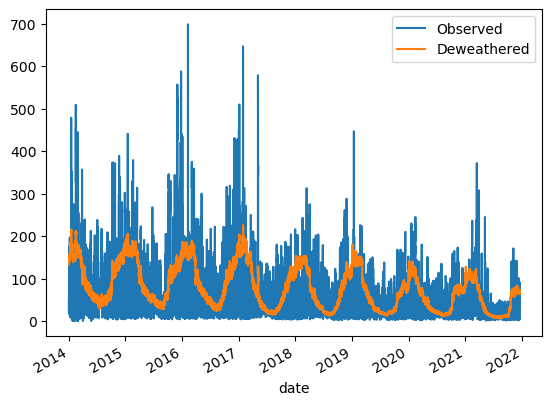

In [15]:
df_dew.plot()

In [16]:
ad.modStats(df,set='testing')

/Users/user/Documents/GitHub/NORmet/normet/autodew.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'value_predict']=automl.predict(df)


,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_Value,COE,IOA
0,5800,0.818103,0.957729,17.971528,0.017243,0.323565,29.787027,0.866414,0.0,0.562559,0.781279


In [17]:
import normet.pdp as pdp

In [18]:
pdp_value=pdp.pdp_all(automl,df,feature_names=all_features)

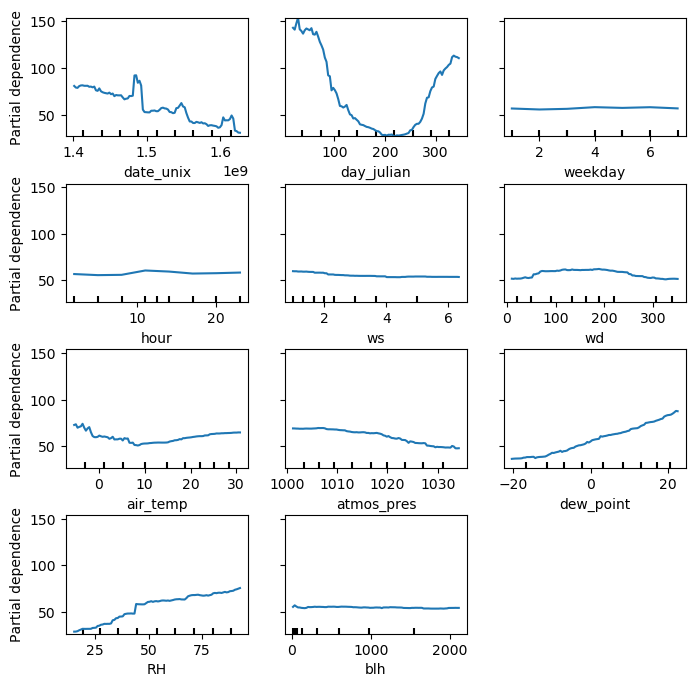

In [19]:
pdp.pdp_plot(automl, df, feature_names=all_features,figsize=(8,8),hspace=0.4)

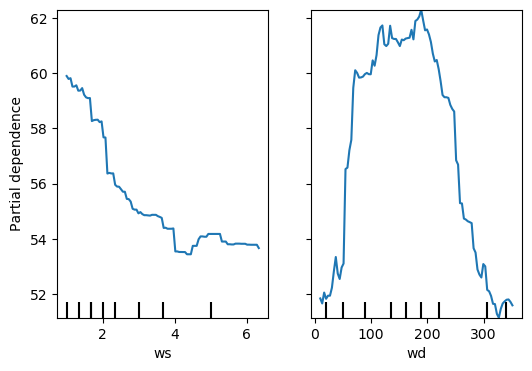

In [20]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['ws','wd'],kind='average',figsize=(6,4))

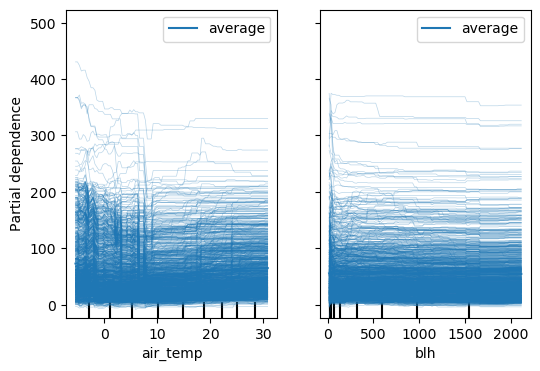

In [21]:
pdp.pdp_plot(automl, df, feature_names=all_features,variables=['air_temp','blh'],kind='both',figsize=(6,4))

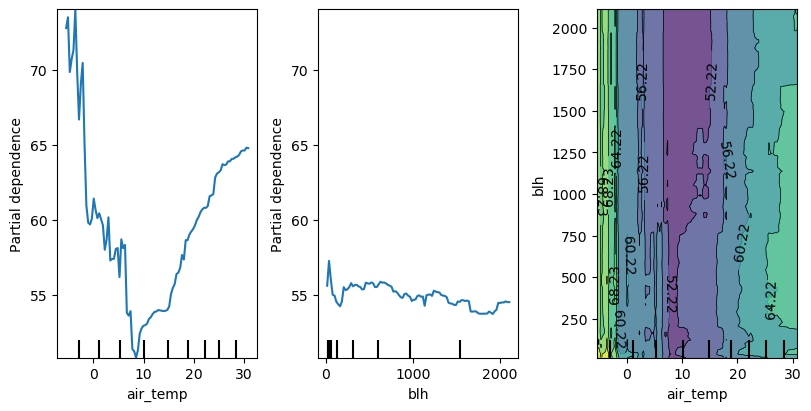

In [22]:
pdp.pdp_interaction(automl,df,variables=['air_temp','blh',('air_temp','blh')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

/Users/user/Documents/GitHub/NORmet/normet/pdp.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,cat_col]=codes
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 56.859244104793206 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/_plot/partial_dependence.py:1162: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(XX, YY, Z, levels=Z_level, linewidths=0.5, colors="k")


ValueError: Contour levels must be increasing

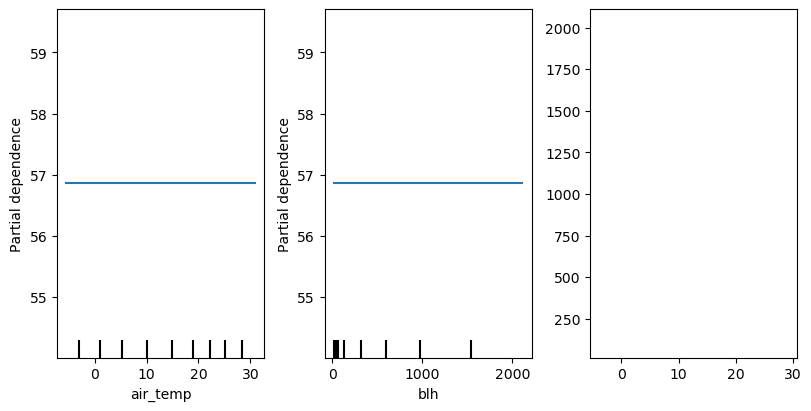

In [23]:
pdp.pdp_nointeraction(automl,df,feature_names=all_features,variables=['air_temp','blh',('air_temp','blh')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

In [ ]:
pdp.pdp_interaction(automl,df,variables=['air_temp','day_julian',('air_temp','day_julian')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

In [ ]:
pdp.pdp_nointeraction(automl,df,feature_names=all_features,variables=['air_temp','day_julian',('air_temp','day_julian')],
                  kind='average',training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)